 <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido: Fabian Villada

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [1]:


# Insertar aquí el código para inicializar tu notebook
########################################################


NameError: name 'signal' is not defined

In [18]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [19]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

Text(0.5, 0, 'Tiempo [s]')

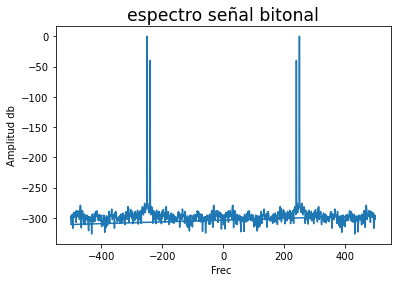

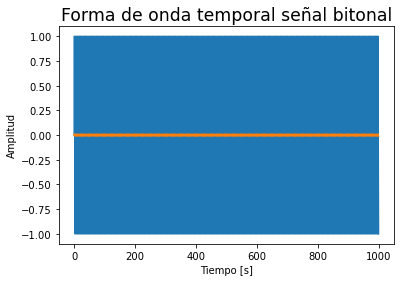

In [11]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

"""

xx1: señal tono f0 " pi/2 = fs/4 ya que df=fs/N = 2pi/N"
xx2: señal tono f1 = f1 + 10 * (resolucion espectral)
xx3 : señal bitonal
fftabs: modulo espectro frecuencial calculado con numpy fft


@author: Fabian Villada
"""

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fft import fft

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
    '''Genera una senial senoidal con los parametros indicados.

    Keyword arguments:
    a0 -- Valor pico de la senoidal
    f0 -- frecuencia de la senial
    ph -- fase de la senial
    N -- numero de muestras de la senial
    fs - frecuencia de muestro de la senial
                                

    Returns: array of float, array of float

    ''' 
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################


N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N # resolucion espectral equivale a( 2 * np.pi/N )

a1 = 1  # Volts
p1 = 0 
f1 =  fs/4   # mitad dd la banda digital


a2_db = -40 # 20*log a1/a0 = -40
a2 = a1 *[ 10**(a2_db/20) ]
p2 = 0
f2 = f1 + 10 * df

Norma = N/2 # Criterio de Normalizacion



##### construyo señal temporal #######

tt , xx1 = generador_senoidal(fs=fs , f0=f1 , N = N , a0 = a1 , p0 = p1)
tt , xx2 = generador_senoidal(fs=fs , f0=f2 , N = N , a0 = a2 , p0 = p2)
xx3 = xx1 + xx2

###### Evaluo espectro con numpy fft #######

fftabs = np.abs(np.fft.fft(xx3))/Norma
fftabs = np.fft.fftshift(fftabs, axes=0)
fftabs = 20*np.log10(fftabs)
freq = np.fft.fftfreq(len(xx3),1/N)

######Graficos###########

plt.figure(1)
plt.plot(freq , fftabs , label='')
plt.title('espectro señal bitonal', fontsize = 'xx-large')
plt.ylabel('Amplitud db')
plt.xlabel('Frec ')

plt.figure(2)
plt.plot(xx1)
plt.plot(xx2)
plt.title('Forma de onda temporal señal bitonal', fontsize = 'xx-large')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')



<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,
moderada,
máxima,


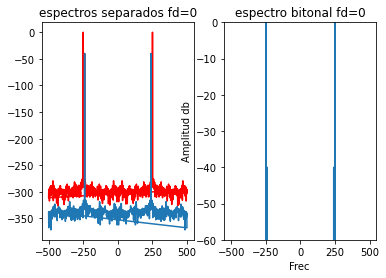

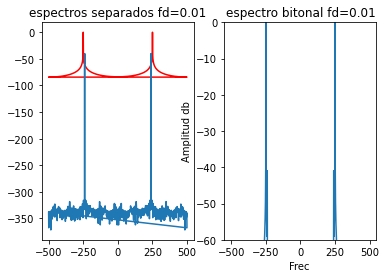

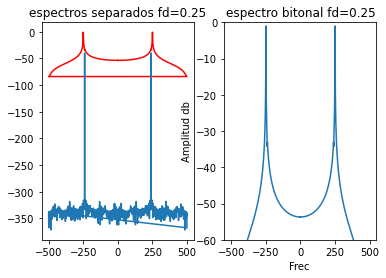

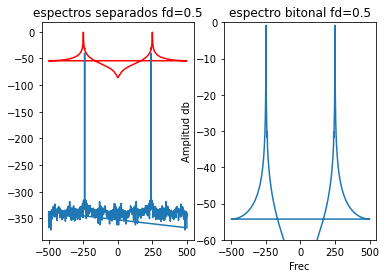

In [13]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fft import fft

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
    #     '''Genera una senial senoidal con los parametros indicados.

    # Keyword arguments:
    # a0 -- Valor pico de la senoidal
    # f0 -- frecuencia de la senial
    # ph -- fase de la senial
    # N -- numero de muestras de la senial
    # fs - frecuencia de muestro de la senial
                                

    # Returns: array of float, array of float

    # ''' 
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################

N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N # resolucion espectral equivale a( 2 * np.pi/N )

a1 = 1  # Volts
p1 = 0 
f1 =  fs/4   # mitad dd la banda digital


a2_db = -40 # 20*log a1/a0 = -40
a2 = a1 *[ 10**(a2_db/20) ]
p2 = 0
f2 = f1 + 10 * df

Norma = N/2 # Criterio de Normalizacion

fd = [0, 0.01, 0.25, 0.5]  # arreglo para desintonias

for i in range(len(fd)):

    f1 = f1  + fd[i] * df 

    tt , xx1 = generador_senoidal(fs=fs , f0=f1 , N=N , a0=a1 , p0=p1)
    tt , xx2 = generador_senoidal(fs=fs , f0=f2 , N=N , a0=a2 , p0=p2)
    xx3 = xx1+xx2
    
    #evaluo espectro de las señales con numpy fft dentro del ciclo for#
    
    fftabs3 = np.abs(np.fft.fft(xx3))/Norma
    fftabs3 = np.fft.fftshift(fftabs3, axes=0)
    fftabs = 20*np.log10(fftabs3)
    freq = np.fft.fftfreq(len(xx3),1/N)
    
    fftabs1 = np.abs(np.fft.fft(xx1))/Norma
    fftabs1 = np.fft.fftshift(fftabs1, axes=0)
    fftabs1 = 20*np.log10(fftabs3)
    freq1 = np.fft.fftfreq(len(xx1),1/N)
    
    fftabs2 = np.abs(np.fft.fft(xx2))/Norma
    fftabs2 = np.fft.fftshift(fftabs2, axes=0)
    fftabs2 = 20*np.log10(fftabs2)
    freq2 = np.fft.fftfreq(len(xx2),1/N)
    
    #Muestra graficos dentro del ciclo#
    
    plt.figure(i+1)
    plt.title('espectros')
    plt.subplot(1 , 2 , 1)
    plt.plot(freq1 , fftabs1 , color='r')
    plt.plot(freq2 , fftabs2)
    plt.title('espectros separados fd='+str(fd[i]))
    plt.subplot(1 , 2 , 2) # muestro en 1 fila dos columnas el primer grafico
    plt.plot(freq , fftabs , label='')
    plt.ylim(-60 , 0)
    plt.title('espectro bitonal fd=' + str(fd[i]))
    plt.ylabel('Amplitud db')
    plt.xlabel('Frec ')
    

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [23]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [24]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [26]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [28]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
